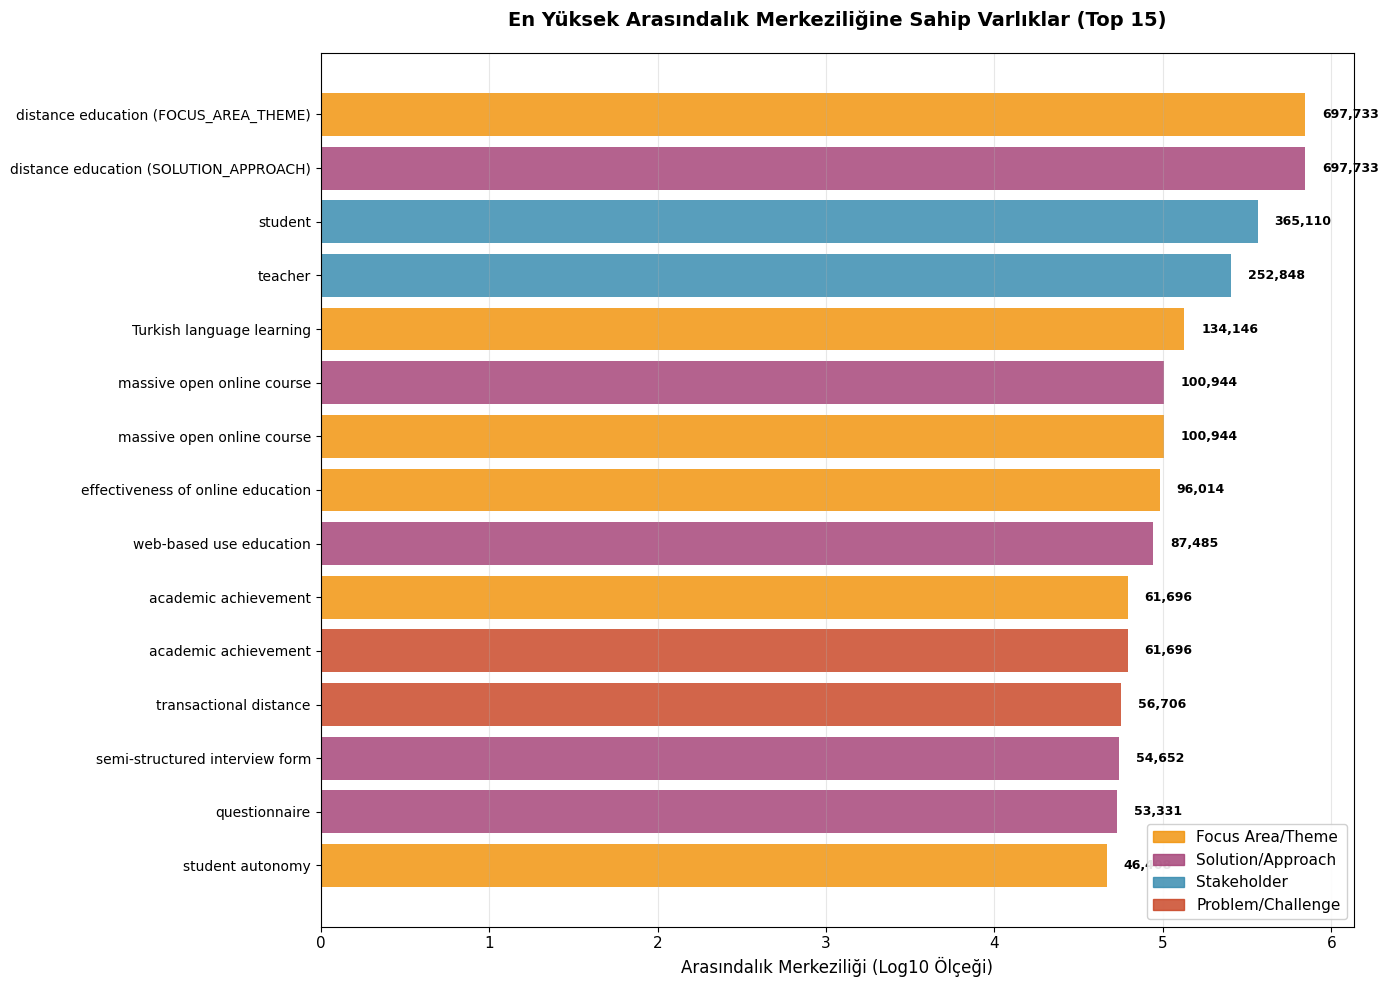

=== EN YÜKSEK ARASINDALIK MERKEZİLİĞİ ===
En yüksek: distance education - 697,733
Distance education dışında en yüksek: student - 365,110


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Türkçe karakter desteği
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11

# En yüksek arasındalık merkeziliği verisi (top 15 seçelim)
top_betweenness_data = [
    {"name": "distance education", "entity_type": "FOCUS_AREA_THEME", "betweenness_centrality": 697732.63},
    {"name": "distance education", "entity_type": "SOLUTION_APPROACH", "betweenness_centrality": 697732.63},
    {"name": "student", "entity_type": "STAKEHOLDER", "betweenness_centrality": 365110.15},
    {"name": "teacher", "entity_type": "STAKEHOLDER", "betweenness_centrality": 252847.64},
    {"name": "Turkish language learning", "entity_type": "FOCUS_AREA_THEME", "betweenness_centrality": 134145.74},
    {"name": "massive open online course", "entity_type": "SOLUTION_APPROACH", "betweenness_centrality": 100944.03},
    {"name": "massive open online course", "entity_type": "FOCUS_AREA_THEME", "betweenness_centrality": 100944.03},
    {"name": "effectiveness of online education", "entity_type": "FOCUS_AREA_THEME", "betweenness_centrality": 96013.95},
    {"name": "web-based use education", "entity_type": "SOLUTION_APPROACH", "betweenness_centrality": 87485.20},
    {"name": "academic achievement", "entity_type": "FOCUS_AREA_THEME", "betweenness_centrality": 61696.14},
    {"name": "academic achievement", "entity_type": "PROBLEM_CHALLENGE", "betweenness_centrality": 61696.14},
    {"name": "transactional distance", "entity_type": "PROBLEM_CHALLENGE", "betweenness_centrality": 56705.58},
    {"name": "semi-structured interview form", "entity_type": "SOLUTION_APPROACH", "betweenness_centrality": 54652.43},
    {"name": "questionnaire", "entity_type": "SOLUTION_APPROACH", "betweenness_centrality": 53331.07},
    {"name": "student autonomy", "entity_type": "FOCUS_AREA_THEME", "betweenness_centrality": 46408.50}
]

# Renk paleti - entity türlerine göre
colors = {'STAKEHOLDER': '#2E86AB', 'SOLUTION_APPROACH': '#A23B72', 
          'FOCUS_AREA_THEME': '#F18F01', 'PROBLEM_CHALLENGE': '#C73E1D'}

# DataFrame oluştur
df_betweenness = pd.DataFrame(top_betweenness_data)

# Figure oluşturma
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Renkleri ayarla
entity_colors = [colors[entity_type] for entity_type in df_betweenness['entity_type']]

# Logaritmik ölçek kullanarak horizontal bar chart
# Arasındalık değerleri çok büyük olduğu için log ölçeği kullanıyoruz
log_betweenness = np.log10(df_betweenness['betweenness_centrality'] + 1)

bars = ax.barh(range(len(df_betweenness)), log_betweenness, 
               color=entity_colors, alpha=0.8)

# Y ekseni etiketleri
y_labels = []
for _, row in df_betweenness.iterrows():
    if row['name'] == 'distance education':
        label = f"{row['name']} ({row['entity_type']})"
    else:
        label = row['name']
    y_labels.append(label)

ax.set_yticks(range(len(df_betweenness)))
ax.set_yticklabels(y_labels, fontsize=10)
ax.set_xlabel('Arasındalık Merkeziliği (Log10 Ölçeği)', fontsize=12)
ax.set_title('En Yüksek Arasındalık Merkeziliğine Sahip Varlıklar (Top 15)', 
             fontsize=14, fontweight='bold', pad=20)

# Değerleri çubukların yanına yazma (orijinal değerler)
for i, (bar, value) in enumerate(zip(bars, df_betweenness['betweenness_centrality'])):
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'{value:,.0f}',
            ha='left', va='center', fontweight='bold', fontsize=9)

ax.grid(axis='x', alpha=0.3)

# Legend
legend_labels = {'STAKEHOLDER': 'Stakeholder', 'SOLUTION_APPROACH': 'Solution/Approach', 
                'FOCUS_AREA_THEME': 'Focus Area/Theme', 'PROBLEM_CHALLENGE': 'Problem/Challenge'}
legend_elements = [plt.Rectangle((0,0),1,1, color=colors[entity], alpha=0.8, label=legend_labels[entity]) 
                  for entity in df_betweenness['entity_type'].unique()]
ax.legend(handles=legend_elements, loc='lower right', framealpha=0.9)

# Invert y-axis so highest values are at the top
ax.invert_yaxis()
#savefig
plt.savefig('5.2.3_betweenness_centrality_top15.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Özet istatistikler
print("=== EN YÜKSEK ARASINDALIK MERKEZİLİĞİ ===")
print(f"En yüksek: {df_betweenness.iloc[0]['name']} - {df_betweenness.iloc[0]['betweenness_centrality']:,.0f}")
print(f"Distance education dışında en yüksek: {df_betweenness.iloc[2]['name']} - {df_betweenness.iloc[2]['betweenness_centrality']:,.0f}")


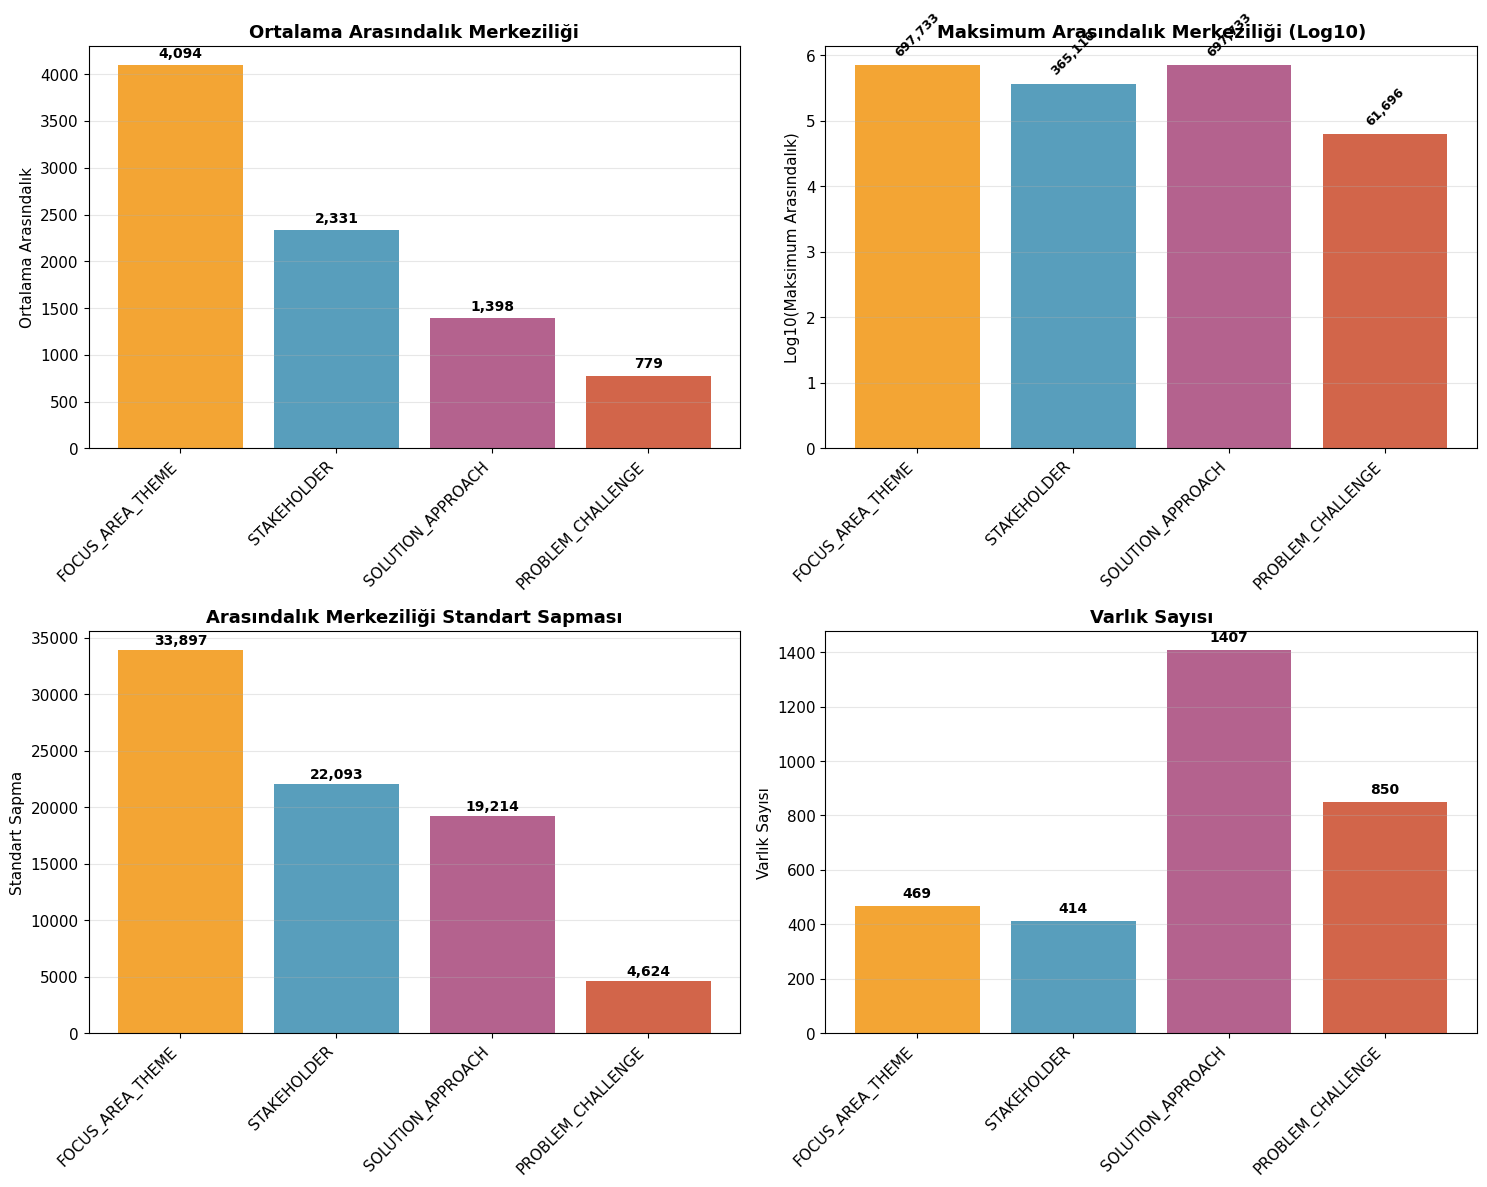

=== VARLıK TÜRLERİNE GÖRE ARASINDALIK MERKEZİLİĞİ İSTATİSTİKLERİ ===
Varlık Türü          Sayı     Ort.         Maks.        Std.Sapma   
----------------------------------------------------------------------
FOCUS_AREA_THEME     469      4,094        697,733      33,897      
STAKEHOLDER          414      2,331        365,110      22,093      
SOLUTION_APPROACH    1407     1,398        697,733      19,214      
PROBLEM_CHALLENGE    850      779          61,696       4,624       


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Türkçe karakter desteği
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11

# Varlık türlerine göre arasındalık merkeziliği istatistikleri
betweenness_stats_data = [
    {"entity_type": "FOCUS_AREA_THEME", "node_count": 469, "avg_betweenness": 4094.28, "min_betweenness": 0.0, "max_betweenness": 697732.63, "stdev_betweenness": 33896.61},
    {"entity_type": "STAKEHOLDER", "node_count": 414, "avg_betweenness": 2330.97, "min_betweenness": 0.0, "max_betweenness": 365110.15, "stdev_betweenness": 22092.63},
    {"entity_type": "SOLUTION_APPROACH", "node_count": 1407, "avg_betweenness": 1398.14, "min_betweenness": 0.0, "max_betweenness": 697732.63, "stdev_betweenness": 19214.33},
    {"entity_type": "PROBLEM_CHALLENGE", "node_count": 850, "avg_betweenness": 779.02, "min_betweenness": 0.0, "max_betweenness": 61696.14, "stdev_betweenness": 4624.38}
]

# DataFrame oluştur
df_stats = pd.DataFrame(betweenness_stats_data)

# Renk paleti
colors = ['#F18F01', '#2E86AB', '#A23B72', '#C73E1D']

# Alt grafik oluşturma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Ortalama arasındalık merkeziliği
bars1 = ax1.bar(df_stats['entity_type'], df_stats['avg_betweenness'], 
                color=colors, alpha=0.8)
ax1.set_title('Ortalama Arasındalık Merkeziliği', fontsize=13, fontweight='bold')
ax1.set_ylabel('Ortalama Arasındalık', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Değerleri çubukların üzerine yazma
for bar, value in zip(bars1, df_stats['avg_betweenness']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{value:,.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Maksimum arasındalık merkeziliği (log scale)
log_max = np.log10(df_stats['max_betweenness'] + 1)
bars2 = ax2.bar(df_stats['entity_type'], log_max, 
                color=colors, alpha=0.8)
ax2.set_title('Maksimum Arasındalık Merkeziliği (Log10)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Log10(Maksimum Arasındalık)', fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Orijinal değerleri çubukların üzerine yazma
for i, (bar, value) in enumerate(zip(bars2, df_stats['max_betweenness'])):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{value:,.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=9, rotation=45)

# 3. Standart sapma
bars3 = ax3.bar(df_stats['entity_type'], df_stats['stdev_betweenness'], 
                color=colors, alpha=0.8)
ax3.set_title('Arasındalık Merkeziliği Standart Sapması', fontsize=13, fontweight='bold')
ax3.set_ylabel('Standart Sapma', fontsize=11)
ax3.grid(axis='y', alpha=0.3)

# Değerleri çubukların üzerine yazma
for bar, value in zip(bars3, df_stats['stdev_betweenness']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 200,
             f'{value:,.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Varlık sayısı
bars4 = ax4.bar(df_stats['entity_type'], df_stats['node_count'], 
                color=colors, alpha=0.8)
ax4.set_title('Varlık Sayısı', fontsize=13, fontweight='bold')
ax4.set_ylabel('Varlık Sayısı', fontsize=11)
ax4.grid(axis='y', alpha=0.3)

# Değerleri çubukların üzerine yazma
for bar, value in zip(bars4, df_stats['node_count']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(value)}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# X eksen etiketlerini döndürme
for ax in [ax1, ax2, ax3, ax4]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

#savefig
plt.savefig('5.2.4.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Özet tablo yazdırma
print("=== VARLıK TÜRLERİNE GÖRE ARASINDALIK MERKEZİLİĞİ İSTATİSTİKLERİ ===")
print(f"{'Varlık Türü':<20} {'Sayı':<8} {'Ort.':<12} {'Maks.':<12} {'Std.Sapma':<12}")
print("-" * 70)
for _, row in df_stats.iterrows():
    print(f"{row['entity_type']:<20} {row['node_count']:<8} "
          f"{row['avg_betweenness']:<12,.0f} {row['max_betweenness']:<12,.0f} "
          f"{row['stdev_betweenness']:<12,.0f}")


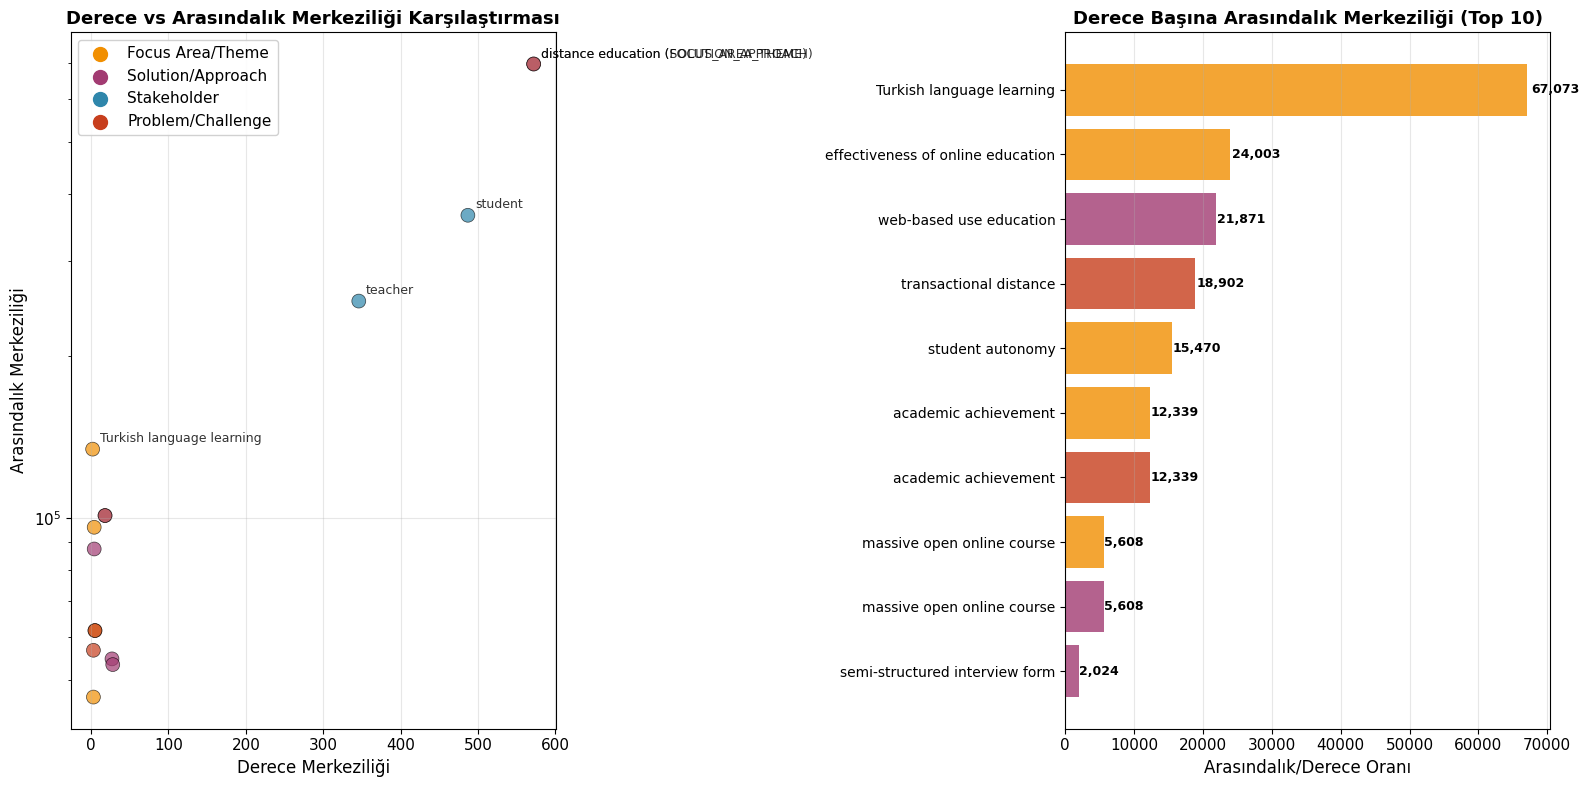

=== DERECE VS ARASINDALIK MERKEZİLİĞİ KARŞILAŞTIRMASI ===

 En yüksek betweenness/degree oranına sahip varlıklar:
Turkish language learning: 67,072.87
effectiveness of online education: 24,003.49
web-based use education: 21,871.30
transactional distance: 18,901.86
student autonomy: 15,469.50


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Türkçe karakter desteği
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11

# Derece vs arasındalık merkeziliği karşılaştırması (top 15)
comparison_data = [
    {"name": "distance education", "entity_type": "FOCUS_AREA_THEME", "degree_centrality": 572.0, "betweenness_centrality": 697732.63, "betweenness_per_degree": 1219.81},
    {"name": "distance education", "entity_type": "SOLUTION_APPROACH", "degree_centrality": 572.0, "betweenness_centrality": 697732.63, "betweenness_per_degree": 1219.81},
    {"name": "student", "entity_type": "STAKEHOLDER", "degree_centrality": 487.0, "betweenness_centrality": 365110.15, "betweenness_per_degree": 749.71},
    {"name": "teacher", "entity_type": "STAKEHOLDER", "degree_centrality": 346.0, "betweenness_centrality": 252847.64, "betweenness_per_degree": 730.77},
    {"name": "Turkish language learning", "entity_type": "FOCUS_AREA_THEME", "degree_centrality": 2.0, "betweenness_centrality": 134145.74, "betweenness_per_degree": 67072.87},
    {"name": "massive open online course", "entity_type": "FOCUS_AREA_THEME", "degree_centrality": 18.0, "betweenness_centrality": 100944.03, "betweenness_per_degree": 5608.00},
    {"name": "massive open online course", "entity_type": "SOLUTION_APPROACH", "degree_centrality": 18.0, "betweenness_centrality": 100944.03, "betweenness_per_degree": 5608.00},
    {"name": "effectiveness of online education", "entity_type": "FOCUS_AREA_THEME", "degree_centrality": 4.0, "betweenness_centrality": 96013.95, "betweenness_per_degree": 24003.49},
    {"name": "web-based use education", "entity_type": "SOLUTION_APPROACH", "degree_centrality": 4.0, "betweenness_centrality": 87485.20, "betweenness_per_degree": 21871.30},
    {"name": "academic achievement", "entity_type": "FOCUS_AREA_THEME", "degree_centrality": 5.0, "betweenness_centrality": 61696.14, "betweenness_per_degree": 12339.23},
    {"name": "academic achievement", "entity_type": "PROBLEM_CHALLENGE", "degree_centrality": 5.0, "betweenness_centrality": 61696.14, "betweenness_per_degree": 12339.23},
    {"name": "transactional distance", "entity_type": "PROBLEM_CHALLENGE", "degree_centrality": 3.0, "betweenness_centrality": 56705.58, "betweenness_per_degree": 18901.86},
    {"name": "semi-structured interview form", "entity_type": "SOLUTION_APPROACH", "degree_centrality": 27.0, "betweenness_centrality": 54652.43, "betweenness_per_degree": 2024.16},
    {"name": "questionnaire", "entity_type": "SOLUTION_APPROACH", "degree_centrality": 28.0, "betweenness_centrality": 53331.07, "betweenness_per_degree": 1904.68},
    {"name": "student autonomy", "entity_type": "FOCUS_AREA_THEME", "degree_centrality": 3.0, "betweenness_centrality": 46408.50, "betweenness_per_degree": 15469.50}
]

# DataFrame oluştur
df_comparison = pd.DataFrame(comparison_data)

# Renk paleti
colors = {'STAKEHOLDER': '#2E86AB', 'SOLUTION_APPROACH': '#A23B72', 
          'FOCUS_AREA_THEME': '#F18F01', 'PROBLEM_CHALLENGE': '#C73E1D'}

# Figure oluşturma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 1. Scatter plot: Derece vs Arasındalık Merkeziliği
entity_colors = [colors[entity_type] for entity_type in df_comparison['entity_type']]

# Log scale kullan (değerler çok farklı büyüklüklerde)
scatter = ax1.scatter(df_comparison['degree_centrality'], 
                     df_comparison['betweenness_centrality'],
                     c=entity_colors, s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

ax1.set_xlabel('Derece Merkeziliği', fontsize=12)
ax1.set_ylabel('Arasındalık Merkeziliği', fontsize=12)
ax1.set_yscale('log')
ax1.set_title('Derece vs Arasındalık Merkeziliği Karşılaştırması', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# En important noktaları label ile işaretle (top 5)
for i in range(5):
    row = df_comparison.iloc[i]
    if row['name'] == 'distance education':
        label = f"{row['name']} ({row['entity_type']})"
    else:
        label = row['name']
    ax1.annotate(label, 
                (row['degree_centrality'], row['betweenness_centrality']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)

# Legend
legend_labels = {'STAKEHOLDER': 'Stakeholder', 'SOLUTION_APPROACH': 'Solution/Approach', 
                'FOCUS_AREA_THEME': 'Focus Area/Theme', 'PROBLEM_CHALLENGE': 'Problem/Challenge'}
legend_elements = [plt.scatter([], [], c=colors[entity], s=100, label=legend_labels[entity]) 
                  for entity in df_comparison['entity_type'].unique()]
ax1.legend(handles=legend_elements, loc='upper left', framealpha=0.9)

# 2. Bar chart: Betweenness per Degree (top 10)
df_sorted = df_comparison.sort_values('betweenness_per_degree', ascending=False).head(10)
entity_colors_sorted = [colors[entity_type] for entity_type in df_sorted['entity_type']]

bars = ax2.barh(range(len(df_sorted)), df_sorted['betweenness_per_degree'],
                color=entity_colors_sorted, alpha=0.8)

# Y ekseni etiketleri
y_labels = []
for _, row in df_sorted.iterrows():
    if row['name'] == 'distance education':
        label = f"{row['name']} ({row['entity_type']})"
    else:
        label = row['name']
    y_labels.append(label)

ax2.set_yticks(range(len(df_sorted)))
ax2.set_yticklabels(y_labels, fontsize=10)
ax2.set_xlabel('Arasındalık/Derece Oranı', fontsize=12)
ax2.set_title('Derece Başına Arasındalık Merkeziliği (Top 10)', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Değerleri çubukların yanına yazma
for i, (bar, value) in enumerate(zip(bars, df_sorted['betweenness_per_degree'])):
    width = bar.get_width()
    ax2.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{value:,.0f}',
             ha='left', va='center', fontweight='bold', fontsize=9)

# Invert y-axis
ax2.invert_yaxis()

#savefig
plt.savefig('5.2.5.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Özet istatistikler
print("=== DERECE VS ARASINDALIK MERKEZİLİĞİ KARŞILAŞTIRMASI ===")
print("\n En yüksek betweenness/degree oranına sahip varlıklar:")
for i, row in df_sorted.head(5).iterrows():
    print(f"{row['name']}: {row['betweenness_per_degree']:,.2f}")
